# Resolución del Problema: Cálculo de la Raíz Cuadrada de 7 mediante Métodos Numéricos

---

### 📌 **Descripción del Problema**
Se busca encontrar una aproximación numérica de la raíz cuadrada de 7, es decir, resolver la ecuación:

\[
x^2 - 7 = 0
\]

utilizando diferentes métodos numéricos iterativos.

---

### 🔢 **Métodos Utilizados**
Se implementaron los siguientes métodos numéricos:

1. **Bisección**: Divide iterativamente un intervalo hasta encontrar la raíz con suficiente precisión.
2. **Regula Falsi**: Similar a bisección, pero usa interpolación lineal para mejorar la convergencia.
3. **Newton-Raphson**: Usa la derivada para aproximar la raíz con convergencia cuadrática.
4. **Punto Fijo**: Reescribe la ecuación en la forma \( x = g(x) \) y la resuelve iterativamente.
5. **Secante**: Similar a Newton-Raphson, pero sin necesidad de derivadas.

---

### ⚙️ **Parámetros de Configuración**
- **Función:** \( f(x) = x^2 - 7 \)
- **Derivada:** \( f'(x) = 2x \) (para Newton-Raphson)
- **Intervalo inicial:** \([2,3]\) (para métodos basados en intervalos)
- **Valores iniciales:** \( x_0 = 2.5, x_1 = 2.7 \) (para métodos iterativos)
- **Tolerancia:** \( 10^{-6} \)
- **Máximo de iteraciones:** 50

---




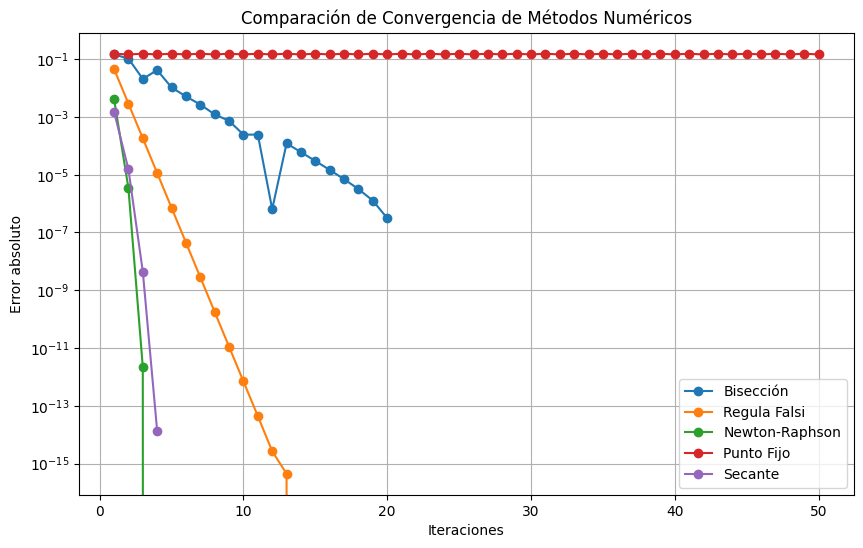


Tabla comparativa de convergencia:
 Iteración    Bisección  Regula Falsi  Newton-Raphson  Punto Fijo      Secante
         1 1.457513e-01  4.575131e-02    4.248689e-03    0.154249 1.520542e-03
         2 1.042487e-01  2.894168e-03    3.405917e-06    0.145751 1.543485e-05
         3 2.075131e-02  1.816908e-04    2.192024e-12    0.154249 4.436575e-09
         4 4.174869e-02  1.140075e-05    0.000000e+00    0.145751 1.332268e-14
         5 1.049869e-02  7.153537e-07    0.000000e+00    0.154249          NaN
         6 5.126311e-03  4.488564e-08    0.000000e+00    0.145751          NaN
         7 2.686189e-03  2.816397e-09    0.000000e+00    0.154249          NaN
         8 1.220061e-03  1.767182e-10    0.000000e+00    0.145751          NaN
         9 7.330639e-04  1.108846e-11    0.000000e+00    0.154249          NaN
        10 2.434986e-04  6.958878e-13    0.000000e+00    0.145751          NaN
        11 2.447827e-04  4.396483e-14    0.000000e+00    0.154249          NaN
        12 6.420

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from biseccion import biseccion
from newton import newton_raphson
from punto_fijo import punto_fijo
from regula_falsi import regula_falsi
from secante import secante

def graficar_errores():
    """
    Función que ejecuta distintos métodos numéricos para encontrar la raíz de la ecuación x^2 - 7 = 0,
    compara sus errores absolutos y genera visualizaciones para analizar su convergencia.
    
    Se generan:
    1. Una gráfica de error absoluto vs iteraciones en escala logarítmica.
    2. Una tabla comparativa de convergencia mostrando los errores en las primeras 10 iteraciones.
    3. Una tabla con las raíces aproximadas encontradas por cada método.
    """
    
    # Definición de la función y su derivada (para métodos que la requieren)
    funcion = "x**2 - 7"
    derivada = "2*x"
    
    # Parámetros iniciales para los métodos
    a, b = 2, 3  
    x0, x1 = 2.5, 2.7 
    tolerancia = 1e-6 
    max_iter = 50 
    
    # Diccionario con los métodos y sus resultados
    metodos = {
        "Bisección": biseccion(funcion, a, b, tolerancia, max_iter),
        "Regula Falsi": regula_falsi(funcion, a, b, tolerancia, max_iter),
        "Newton-Raphson": newton_raphson(funcion, derivada, x0, max_iter),
        "Punto Fijo": punto_fijo(funcion, x0, max_iter),
        "Secante": secante(funcion, x0, x1, tolerancia, max_iter)
    }
    
    # Gráfica de convergencia (Error vs Iteraciones)
    plt.figure(figsize=(10, 6))
    for nombre, (raiz, errores, iteraciones) in metodos.items():
        plt.plot(iteraciones, errores, label=nombre, marker='o')
    
    plt.yscale("log") 
    plt.xlabel("Iteraciones")
    plt.ylabel("Error absoluto")
    plt.title("Comparación de Convergencia de Métodos Numéricos")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Tabla comparativa de errores (Primeras 10 iteraciones)
    max_len = 15
    tabla_errores = {"Iteración": list(range(1, max_len + 1))}
    
    for nombre, (_, errores, iteraciones) in metodos.items():
        errores_truncados = errores[:max_len] + [None] * (max_len - len(errores))
        tabla_errores[nombre] = errores_truncados
    
    df_errores = pd.DataFrame(tabla_errores)
    print("\nTabla comparativa de convergencia:")
    print(df_errores.to_string(index=False))
    
    # Tabla comparativa de raíces aproximadas
    tabla_raices = {
        "Método": list(metodos.keys()),
        "Raíz Aproximada": [f"{raiz:.20f}" for raiz, _, _ in metodos.values()]
    }
    df_raices = pd.DataFrame(tabla_raices)
    print("\nTabla comparativa de raíces aproximadas:")
    print(df_raices.to_string(index=False))

if __name__ == "__main__":
    graficar_errores()